In [4]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import os.path
import pandas as pd

In [51]:
image = cv2.imread('/data/neon/customer_images/getty/superbowl/best/superbowl_best_73.jpg')[:,:,::-1]
heatmap = pd.read_pickle('/home/mdesnoyer/tmp/superbowl_best_73_valence.pkl')

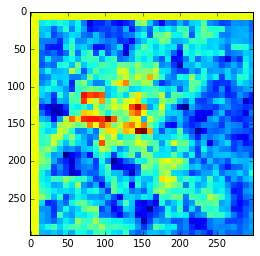

In [67]:
manual_map = np.zeros((299,299))
cur_heat = heatmap[('None', 'None')]
for y in range(cur_heat.shape[0]):
    for x in range(cur_heat.shape[1]):
        manual_map[((y*8)+12):((y*8)+20), ((x*8)+12):((x*8)+20)] = cur_heat[y][x]
        
manual_map = -manual_map
plt.imshow(manual_map)

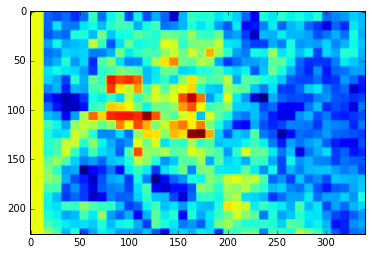

In [82]:
cur_heat = cv2.resize(manual_map, (image.shape[1], image.shape[1]))
cur_heat = cur_heat[((cur_heat.shape[0]-image.shape[0])/2):((cur_heat.shape[0]+image.shape[0])/2), :]
plt.imshow(cur_heat)

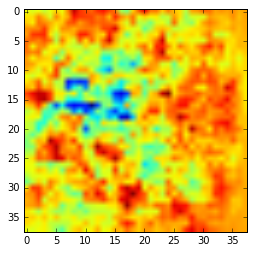

In [36]:
plt.imshow(heatmap[('M', 'None')].T)

(226, 340, 3)


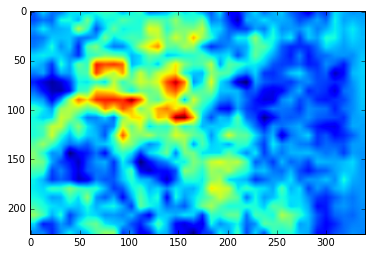

In [65]:
cur_heat = heatmap[('None', 'None')]
cur_heat = cv2.resize(np.array(-cur_heat.T), (image.shape[1], image.shape[1]))
print image.shape
cur_heat = cur_heat[((cur_heat.shape[0]-image.shape[0])/2):((cur_heat.shape[0]+image.shape[0])/2), :]
plt.imshow(cur_heat)

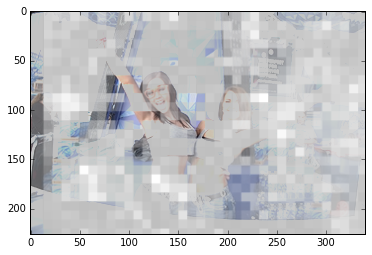

In [83]:
alpha = cur_heat - cur_heat.min()
alpha = alpha / alpha.max() * 255
#alpha = 255-alpha
trans_image = np.zeros((image.shape[0], image.shape[1], 4), dtype=np.uint8)
trans_image[:,:,0:3] = image
trans_image[:,:,3] = alpha
plt.imshow(trans_image)

True

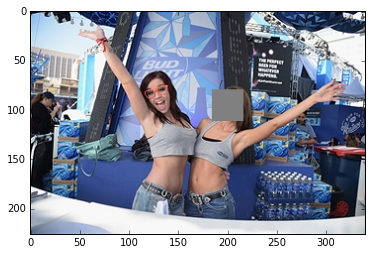

In [26]:
imblock = image.copy()
imblock[80:112, 184:216] = 128
plt.imshow(imblock)
cv2.imwrite('/home/mdesnoyer/tmp/superbowl_best_73_girlcover2.jpg', imblock[:,:,::-1])